## Week 4 task by Denis Khryashchev

In [1]:
from mnist import MNIST
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Loasding the training set
mndata = MNIST('./mnist-data/')
X_train, y_train = mndata.load_training()

# Loading the test set
# X_test, y_test = mndata.load_testing()

In [3]:
# Dimensions of the MNIST data set
len(X_train), len(X_train[0])

(60000, 784)

In [4]:
# Transforming the data into a numpy array
X = np.asarray(X_train)

In [5]:
# Function to calculate the mean distances from the members of each cluster
# to their corresponding cluster centers. L2 is used
def get_mean_distance(X, n_clusters):
    clusters = KMeans(n_clusters = n_clusters, random_state = 2926).fit(X)
    mean_distance = 0
    for i in range(n_clusters):
        points_of_cluster_i = X[np.where(clusters.labels_ == i)]
        center = len(clusters.cluster_centers_[i])
        distance = 0
        for point in points_of_cluster_i:
            distance+= np.linalg.norm(point - center)
        mean_distance+= distance
    return mean_distance / n_clusters

In [6]:
# Calculating the overal mean distances to the cluster centers for 2 to 11 clusters
mean_distances = map(lambda n_clusters: get_mean_distance(X, n_clusters), range(2, 12))

In [7]:
# Selecting the number of clusters that has the 
sorted(zip(range(2, 12), mean_distances), key = lambda x: x[1])

[(11, 115266150.5062827),
 (10, 126792765.55691096),
 (9, 140880850.6187901),
 (8, 158490956.94613907),
 (7, 181132522.224159),
 (6, 211321275.92818534),
 (5, 253585531.11382183),
 (4, 316981913.89227736),
 (3, 422642551.85637),
 (2, 633963827.784554)]

In [8]:
# Function to plot the metrics
def plot_metrics(mean_distances, labels, x_label, y_label):
    fig, ax = plt.subplots(figsize = (18, 6))
    
    plots = ax.plot(labels, mean_distances, linewidth = 3)
    plt.xlabel(x_label, fontsize = 17)
    plt.ylabel(y_label, fontsize = 17)
    plt.xticks(labels)
    ax.grid(True)

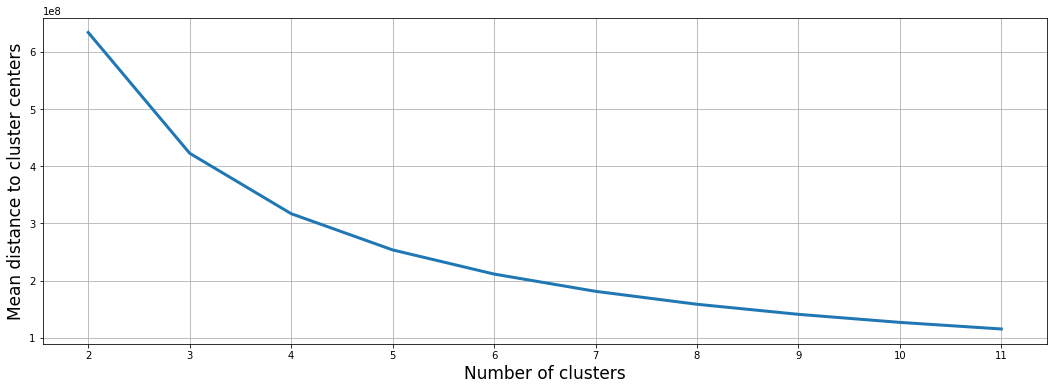

In [9]:
plot_metrics(mean_distances, range(2, 12), 'Number of clusters', 'Mean distance to cluster centers')

### The within-cluster sum of squares metric is a good metric for local optimization during computation of the membership of points in a cluster. But it is hard to apply it as a metric to decide the proper number of clusters. The mean distance to the cluster centers among all the clusters given the cluster number decreases with the number of clusters which seems to be natural because having more cluster centers allows us to put them with higher accuracy among the points in each of the clusters.

### I believe silhouette score should be used as a metric to select the number of K-means clusters.

In [10]:
# Function to calculate the silhouette scores
def get_silhouette(X, n_clusters):
    clustering = KMeans(n_clusters = n_clusters, random_state = 2926)
    labels = clustering.fit_predict(X)

    return silhouette_score(X, labels, sample_size = 5000)

In [11]:
# Calculating the overal mean distances to the cluster centers for 2 to 11 clusters
silhoettes = map(lambda n_clusters: get_silhouette(X, n_clusters), range(2, 12))

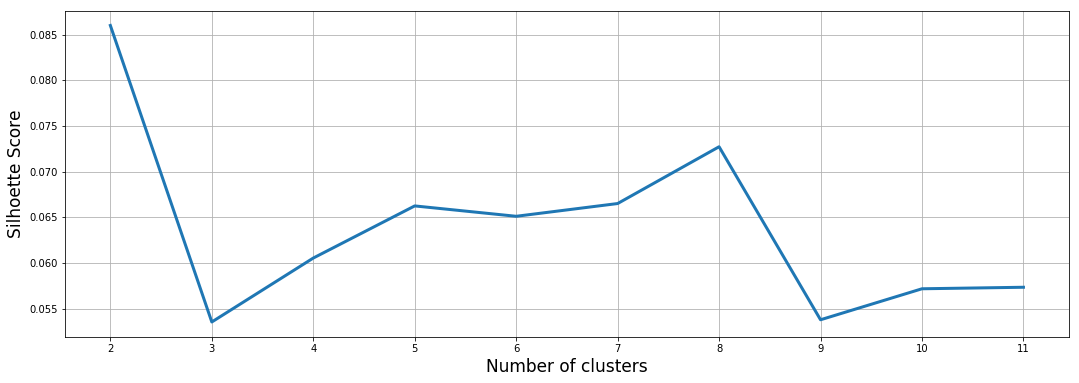

In [12]:
# Plotting the silhoette metrics
plot_metrics(silhoettes, range(2, 12), 'Number of clusters', 'Silhoette Score')

### From our silhoette scores we can tell that the digits are well clustered better with either 2 or 8 clusters. Having all 10 digits on the data set we must conclude that it doesn't get well separated with K-means. The best result we can achieve is splitting the digits into 8 groups with collisions. 